## STEP 1 : DATA COLLECTION

In [1]:
#IMPORTING NECESSARY 00 LIBRARIES
import pandas as pd#for dataframe handling
import numpy as np#for matrices
import matplotlib.pyplot as plt#for plotting graphs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#LOADING & PROCESSING DATA
df = pd.read_csv("psychological_instability_data.csv")#loading the dataset
print('[info] data loaded successfully...')

[info] data loaded successfully...


## STEP 2 : EDA

#### 2a. BASIC EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [3]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


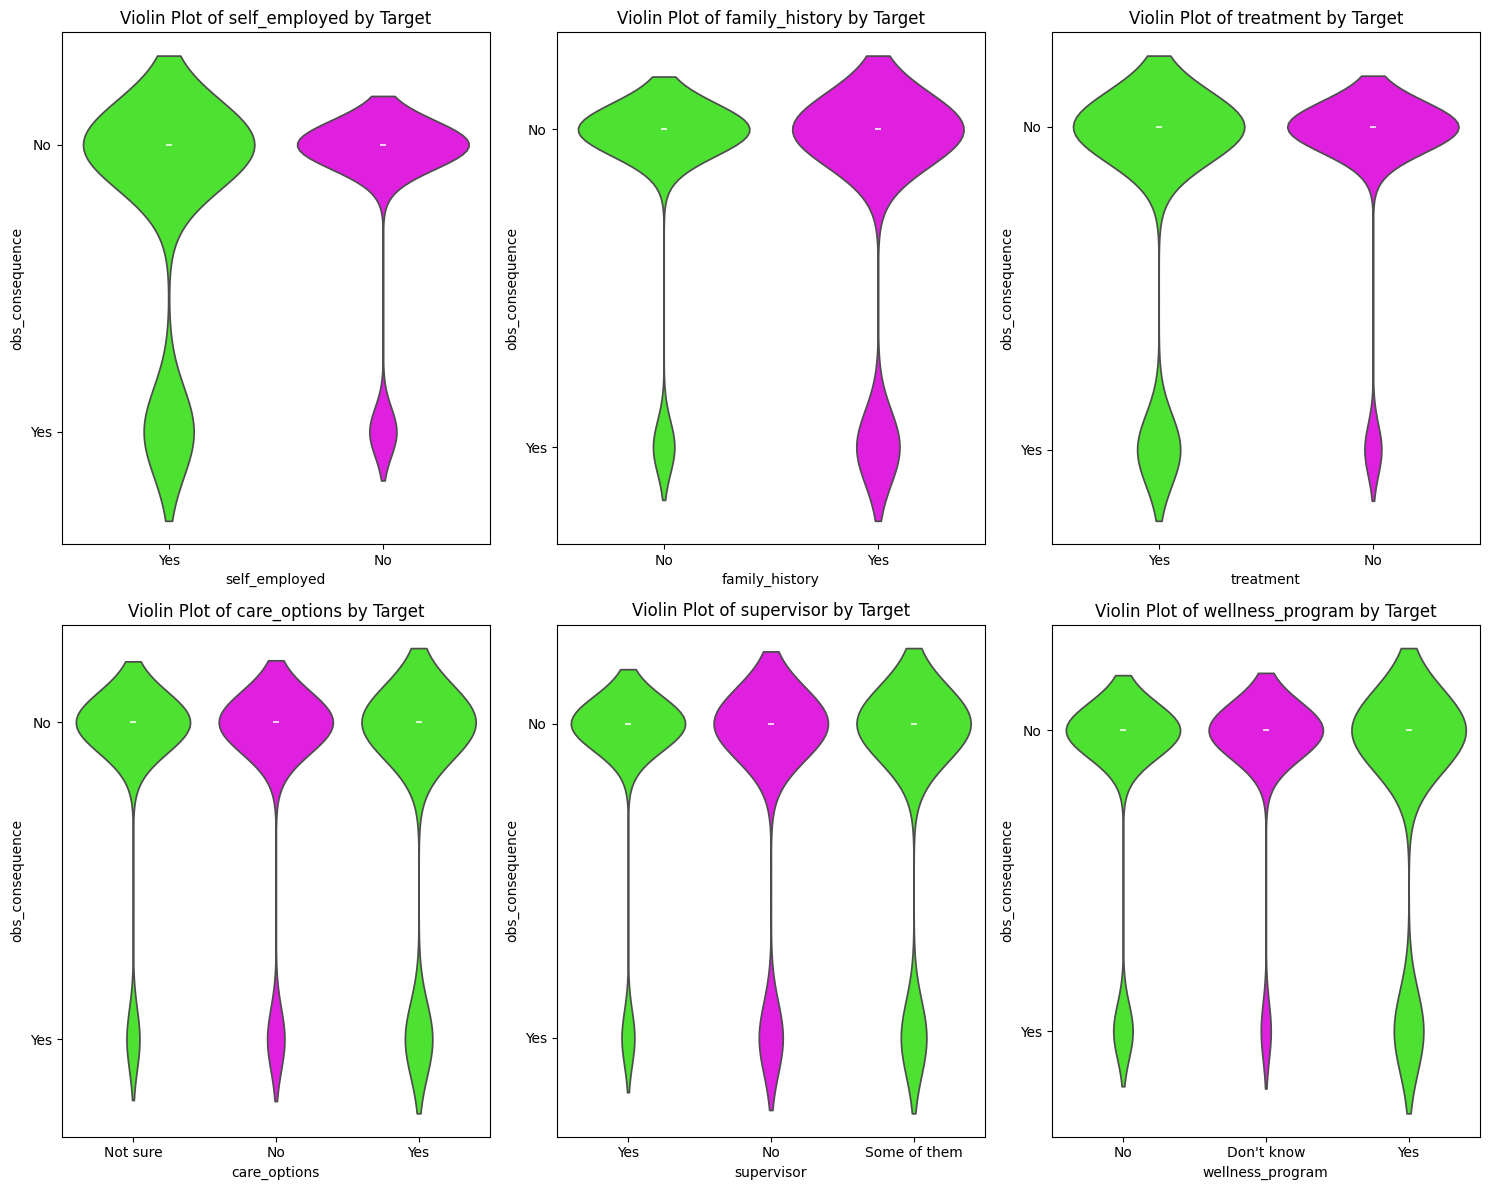

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a custom neon theme palette
neon_palette = ["#39FF14", "#FF00FF"]

# Set the custom neon theme palette
sns.set_palette(neon_palette)

# Specify the columns you want to include in the violin plots
selected_columns = [ 'self_employed', 'family_history','treatment', 'care_options', 'supervisor', 'wellness_program']

# Create a grid for displaying violin plots
num_columns = len(selected_columns)
num_rows = int(np.ceil(num_columns / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(selected_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.violinplot(x=column, y="obs_consequence", data=df, palette=neon_palette)
    plt.title(f"Violin Plot of {column} by Target")

# Adjust layout
plt.tight_layout()

# Show the grid of violin plots
# plt.savefig('eda1.png')
plt.show()


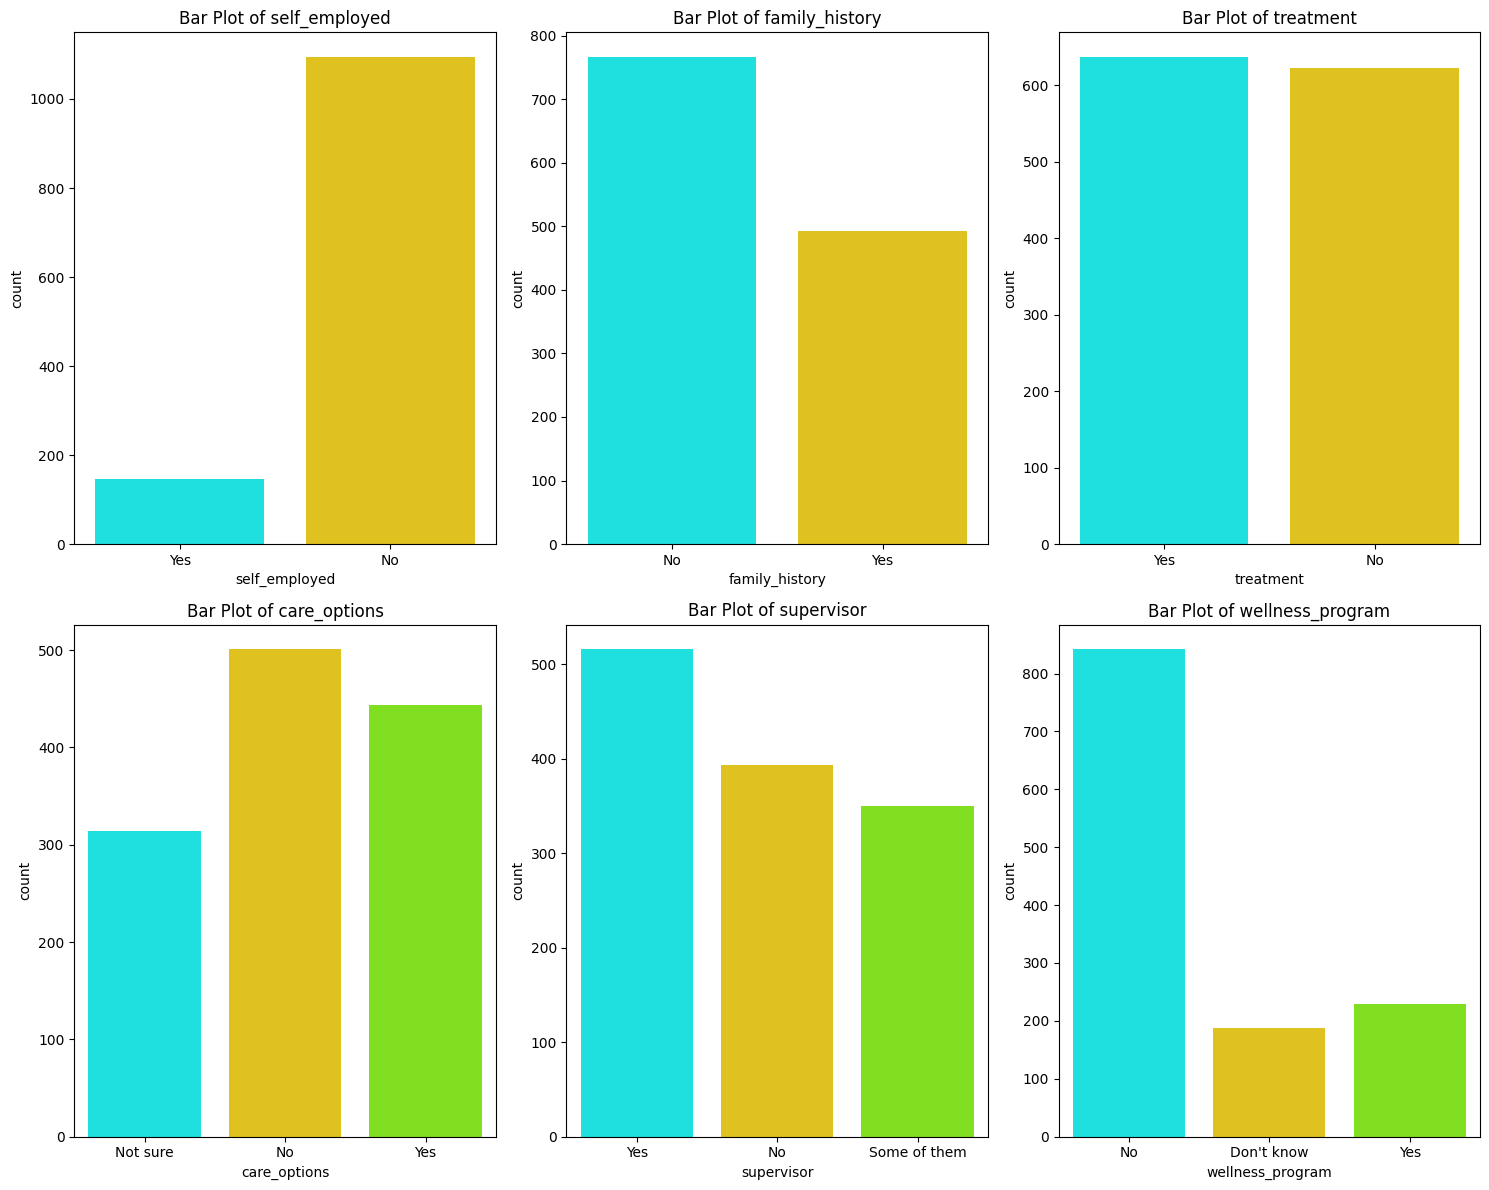

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Define a custom neon theme palette for bar plots
neon_palette_bar = ["#00FFFF", "#FFD700", "#7FFF00", "#FF6347", "#8A2BE2", "#00FA9A"]

# Set the custom neon theme palette for bar plots
sns.set_palette(neon_palette_bar)

# Specify the columns used in the violin plots
selected_columns_bar = [ 'self_employed', 'family_history','treatment', 'care_options', 'supervisor', 'wellness_program']

# Create a grid for displaying bar plots
num_columns_bar = len(selected_columns_bar)
num_rows_bar = int(np.ceil(num_columns_bar / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(selected_columns_bar):
    plt.subplot(num_rows_bar, 3, i + 1)
    sns.countplot(x=column, data=df, palette=neon_palette_bar)
    plt.title(f"Bar Plot of {column}")

# Adjust layout
plt.tight_layout()

# Show the grid of bar plots
# plt.savefig('eda_2.png')
plt.show()


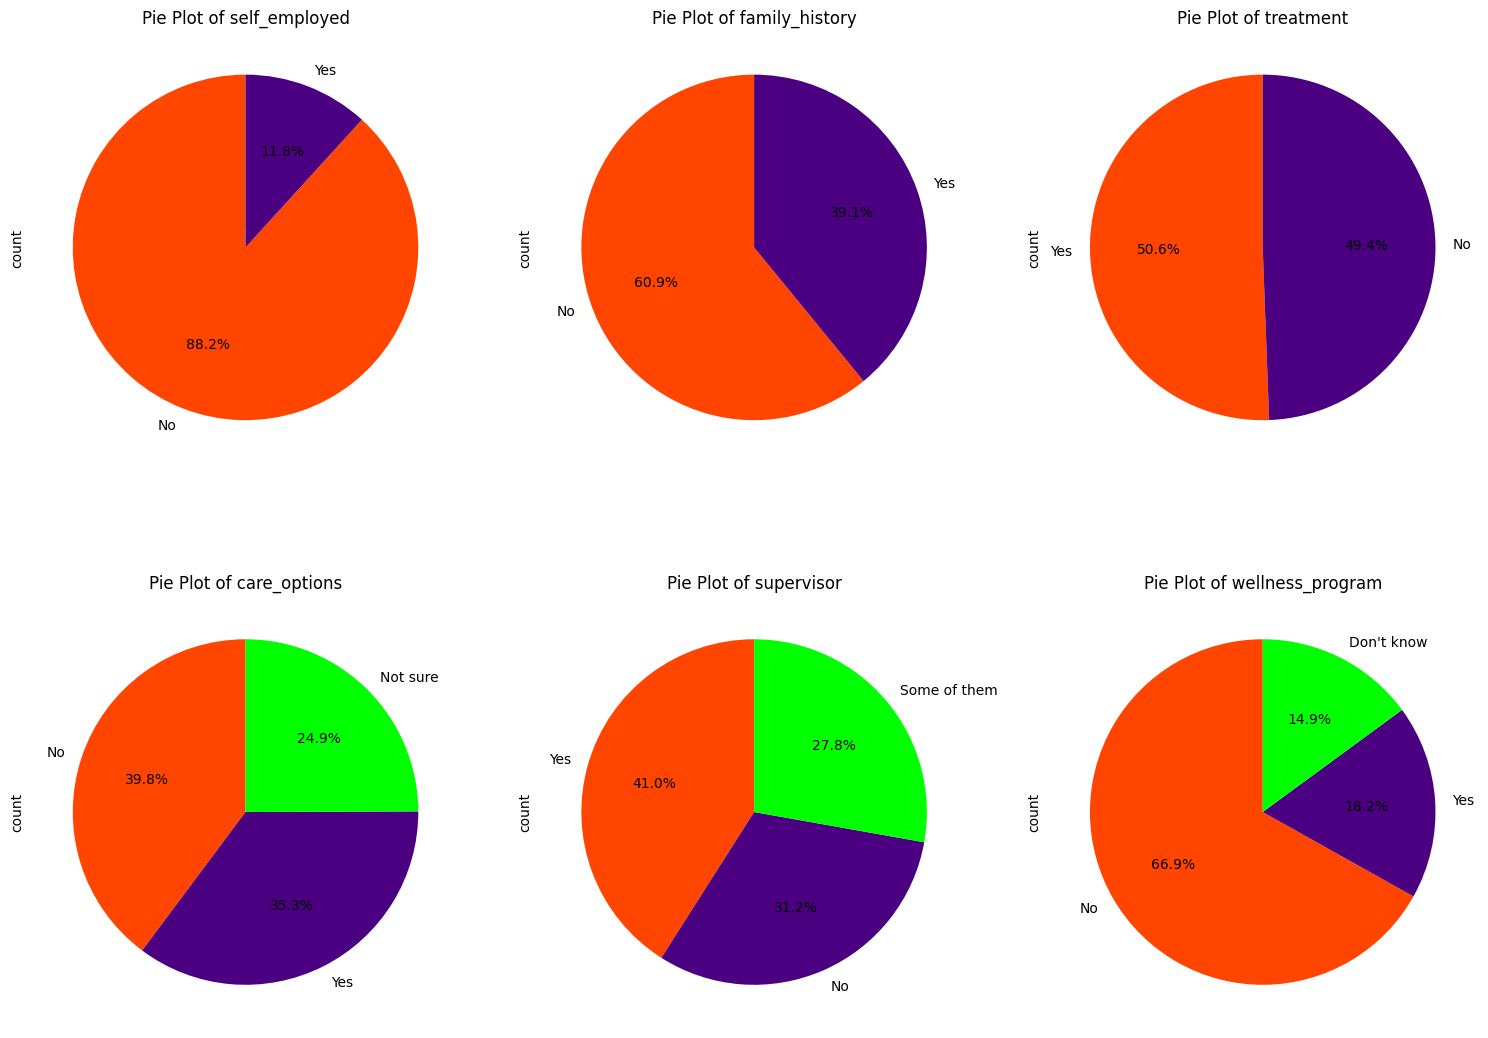

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Define a new eye-catching neon theme palette for pie plots
neon_palette_pie = ["#FF4500", "#4B0082", "#00FF00", "#FFFF00", "#1E90FF", "#FF1493"]

# Set the custom neon theme palette for pie plots
sns.set_palette(neon_palette_pie)

# Specify the columns used in the pie plots
selected_columns_pie = [ 'self_employed', 'family_history','treatment', 'care_options', 'supervisor', 'wellness_program']

# Create a grid for displaying pie plots
num_columns_pie = len(selected_columns_pie)
num_rows_pie = int(np.ceil(num_columns_pie / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(selected_columns_pie):
    plt.subplot(num_rows_pie, 3, i + 1)
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=neon_palette_pie)
    plt.title(f"Pie Plot of {column}")

# Adjust layout
plt.tight_layout()

# Show the grid of pie plots
# plt.savefig('eda_3.png')
plt.show()


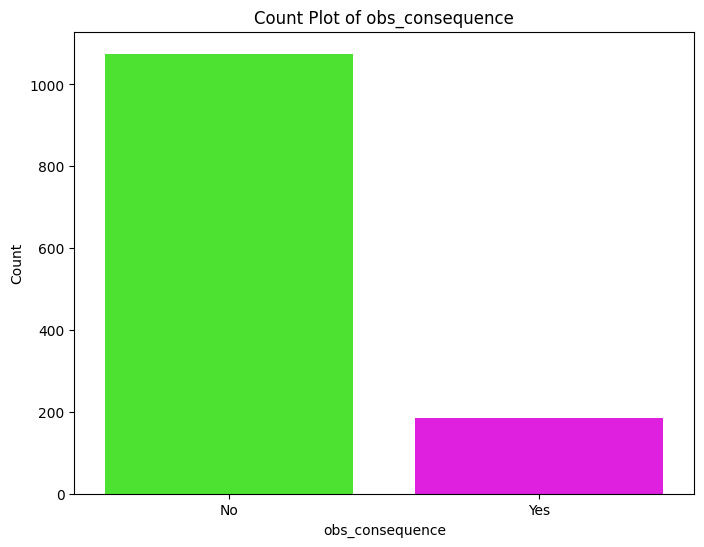

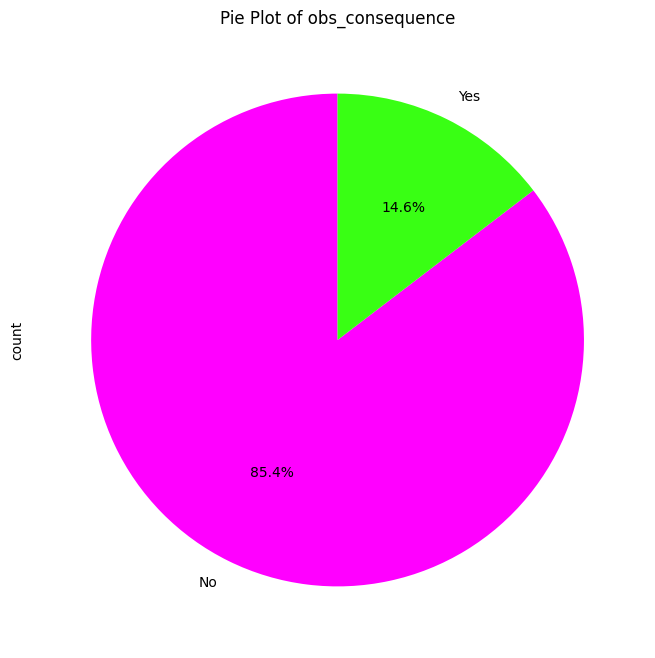

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom neon theme palette for plots
neon_palette = ["#39FF14", "#FF00FF"]

# Set the custom neon theme palette for plots
sns.set_palette(neon_palette)

# Count Plot for 'obs_consequence' column
plt.figure(figsize=(8, 6))
sns.countplot(x='obs_consequence', data=df, palette=neon_palette)
plt.title("Count Plot of obs_consequence")
plt.xlabel("obs_consequence")
plt.ylabel("Count")
# plt.savefig('count_plot_obs_consequence.png')
plt.savefig('eda_4.png')
plt.show()

neon_palette = ["#FF00FF","#39FF14"]
# Pie Plot for 'obs_consequence' column
plt.figure(figsize=(8, 8))
df['obs_consequence'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=neon_palette)
plt.title("Pie Plot of obs_consequence")
# plt.savefig('pie_plot_obs_consequence.png')
plt.savefig('eda_5.png')
plt.show()


## 3. DATA PRE-PROCESSING

In [8]:
df = df.drop(columns=['Timestamp', 'comments', 'no_employees', 'anonymity', 'coworkers',
                      'state'])  # dropping unnecessary columns

x = df["self_employed"].mode()[0]  # replacing NaN values with mode
df["self_employed"].fillna(x, inplace=True)
y = df["work_interfere"].mode()[0]  # replacing NaN values with mode
df["work_interfere"].fillna(y, inplace=True)


male_str = ['M', 'Male', 'male', 'm', 'Male-ish', 'something kinda male?',
            'Mal', 'Male (CIS)', 'male leaning androgynous', 'cis male',
            'Cis Male', 'msle', 'p', 'Mail', 'Make', 'Malr', 'maile']
female_str = ['Female',"Female", 'female', 'Cis Female', 'Woman', 'F',
              'f', 'Femake', 'woman', 'cis-female/femme', 'femail']

# create dictionaries for mapping
male_dict = {key: 0 for key in male_str}
female_dict = {key: 1 for key in female_str}

# map keys from male_str to 0 in dataframe
df['Gender'] = df['Gender'].map(male_dict).fillna(df['Gender'])
# print(df)
# map keys from female_str to 1 in dataframe
df['Gender'] = df['Gender'].map(female_dict).fillna(df['Gender'])
# print(df)
# map remaining keys from complete_list to 2 in dataframe
df['Gender'] = df['Gender'].apply(lambda x: 2 if x not in [0, 1] else x)
# print(df)

print(df.columns[df.isna().any()])

Index([], dtype='object')


In [9]:
a1 = np.arange(1,len(df['Country'].unique().tolist())+1,1)#creating a numpy array of length = number of unique elements
b1 = df['Country'].unique().tolist()#creating a list of unique entries in the given column
c1 = {j:i for i,j in zip(a1,b1)}#creating a dictionary with a1 and b1
df['Country'] = df['Country'].map(c1)#mapping the dictionary to dataframe

a2 = np.arange(1,len(df['self_employed'].unique().tolist())+1,1)
b2 = df['self_employed'].unique().tolist()
c2 = {j:i for i,j in zip(a2,b2)}
df['self_employed'] = df['self_employed'].map(c2)

a3 = np.arange(1,len(df['family_history'].unique().tolist())+1,1)
b3 = df['family_history'].unique().tolist()
c3 = {j:i for i,j in zip(a3,b3)}
df['family_history'] = df['family_history'].map(c3)

a4 = np.arange(1,len(df['treatment'].unique().tolist())+1,1)
b4 = df['treatment'].unique().tolist()
c4 = {j:i for i,j in zip(a4,b4)}
df['treatment'] = df['treatment'].map(c4)

a5 = np.arange(1,len(df['work_interfere'].unique().tolist())+1,1)
b5 = df['work_interfere'].unique().tolist()
c5 = {j:i for i,j in zip(a5,b5)}
df['work_interfere'] = df['work_interfere'].map(c5)

a6 = np.arange(1,len(df['remote_work'].unique().tolist())+1,1)
b6 = df['remote_work'].unique().tolist()
c6 = {j:i for i,j in zip(a6,b6)}
df['remote_work'] = df['remote_work'].map(c6)

a7 = np.arange(1,len(df['tech_company'].unique().tolist())+1,1)
b7 = df['tech_company'].unique().tolist()
c7 = {j:i for i,j in zip(a7,b7)}
df['tech_company'] = df['tech_company'].map(c7)

a8 = np.arange(1,len(df['benefits'].unique().tolist())+1,1)
b8 = df['benefits'].unique().tolist()
c8 = {j:i for i,j in zip(a8,b8)}
df['benefits'] = df['benefits'].map(c8)

a9 = np.arange(1,len(df['care_options'].unique().tolist())+1,1)
b9 = df['care_options'].unique().tolist()
c9 = {j:i for i,j in zip(a9,b9)}
df['care_options'] = df['care_options'].map(c9)

a10 = np.arange(1,len(df['wellness_program'].unique().tolist())+1,1)
b10 = df['wellness_program'].unique().tolist()
c10 = {j:i for i,j in zip(a10,b10)}
df['wellness_program'] = df['wellness_program'].map(c10)

a11 = np.arange(1,len(df['seek_help'].unique().tolist())+1,1)
b11 = df['seek_help'].unique().tolist()
c11 = {j:i for i,j in zip(a11,b11)}
df['seek_help'] = df['seek_help'].map(c11)

a12 = np.arange(1,len(df['leave'].unique().tolist())+1,1)
b12 = df['leave'].unique().tolist()
c12 = {j:i for i,j in zip(a12,b12)}
df['leave'] = df['leave'].map(c12)

a13 = np.arange(1,len(df['mental_health_consequence'].unique().tolist())+1,1)
b13 = df['mental_health_consequence'].unique().tolist()
c13 = {j:i for i,j in zip(a13,b13)}
df['mental_health_consequence'] = df['mental_health_consequence'].map(c13)

a14 = np.arange(1,len(df['phys_health_consequence'].unique().tolist())+1,1)
b14 = df['phys_health_consequence'].unique().tolist()
c14 = {j:i for i,j in zip(a14,b14)}
df['phys_health_consequence'] = df['phys_health_consequence'].map(c14)

a15 = np.arange(1,len(df['supervisor'].unique().tolist())+1,1)
b15 = df['supervisor'].unique().tolist()
c15 = {j:i for i,j in zip(a15,b15)}
df['supervisor'] = df['supervisor'].map(c15)

a16 = np.arange(1,len(df['mental_health_interview'].unique().tolist())+1,1)
b16 = df['mental_health_interview'].unique().tolist()
c16 = {j:i for i,j in zip(a16,b16)}
df['mental_health_interview'] = df['mental_health_interview'].map(c16)

a17 = np.arange(1,len(df['phys_health_interview'].unique().tolist())+1,1)
b17 = df['phys_health_interview'].unique().tolist()
c17 = {j:i for i,j in zip(a17,b17)}
df['phys_health_interview'] = df['phys_health_interview'].map(c17)

a18 = np.arange(1,len(df['mental_vs_physical'].unique().tolist())+1,1)
b18 = df['mental_vs_physical'].unique().tolist()
c18 = {j:i for i,j in zip(a18,b18)}
df['mental_vs_physical'] = df['mental_vs_physical'].map(c18)

df['obs_consequence'] = df['obs_consequence'].map({'Yes':1,'No':2})
df.to_csv('pre_processed_psychological_dataset.csv')

In [11]:
print(df['obs_consequence'].value_counts())
# segregate dataset into input x and output y
X = df.iloc[:, :-1]  # input columns
Y = df.iloc[:, -1]  # output columns

# Perform SMOTE oversampling
from imblearn.over_sampling import SMOTE#since the dataset is imbalanced we are balancing it using SMOTE
oversampler = SMOTE()
X, Y = oversampler.fit_resample(X,Y)

# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,
                                                    random_state=0)

# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('[info] data pre-processing complete....')

obs_consequence
2    1075
1     184
Name: count, dtype: int64
[info] data pre-processing complete....


## STEP 4 : TRAINING THE MODELS

#### TRAINING SVM ALGORITHM

In [12]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train,Y_train)
print('[info] svm training complete...')

joblib.dump(svm,"svm_model.pkl")

[info] svm training complete...


['svm_model.pkl']

#### EVALUATING SVM ALGORITHM

In [13]:
svm_test_prediction = svm.predict(X_test)

print('ACCURACY OF SVM ALGORITHM IS : ',accuracy_score(Y_test,svm_test_prediction))
print('PRECISION OF SVM ALGORITHM IS : ',precision_score(Y_test,svm_test_prediction))
print('RECALL OF SVM ALGORITHM IS : ',recall_score(Y_test,svm_test_prediction))
print('F1 SCORE OF SVM ALGORITHM IS : ',f1_score(Y_test,svm_test_prediction))

ACCURACY OF SVM ALGORITHM IS :  0.8271375464684015
PRECISION OF SVM ALGORITHM IS :  0.7985611510791367
RECALL OF SVM ALGORITHM IS :  0.8571428571428571
F1 SCORE OF SVM ALGORITHM IS :  0.8268156424581006


---

#### TRAINING RANDOM FOREST ALGORITHM

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
print('[info] random forest training complete...')

joblib.dump(rf,"random_forest.pkl")

[info] random forest training complete...


['decision_tree.pkl']

#### EVALUATING RANDOM FOREST ALGORITHM

In [15]:
rf_test_prediction = rf.predict(X_test)

print('ACCURACY OF RANDOM FOREST ALGORITHM IS : ',accuracy_score(Y_test,rf_test_prediction))
print('PRECISION OF RANDOM FOREST ALGORITHM IS : ',precision_score(Y_test,rf_test_prediction))
print('RECALL OF RANDOM FOREST ALGORITHM IS : ',recall_score(Y_test,rf_test_prediction))
print('F1 SCORE OF RANDOM FOREST ALGORITHM IS : ',f1_score(Y_test,rf_test_prediction))

ACCURACY OF RANDOM FOREST ALGORITHM IS :  0.8884758364312267
PRECISION OF RANDOM FOREST ALGORITHM IS :  0.8671586715867159
RECALL OF RANDOM FOREST ALGORITHM IS :  0.9073359073359073
F1 SCORE OF RANDOM FOREST ALGORITHM IS :  0.8867924528301887


---

#### TRAINING DECISION TREE ALGORITHM

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print('[info] decision tree training complete...')

joblib.dump(dt,"decision_tree.pkl")

[info] decision tree training complete...


['decision_tree.pkl']

#### EVALUATING DECISION TREE ALGORITHM

In [17]:
dt_test_prediction = dt.predict(X_test)

print('ACCURACY OF DECISION TREE ALGORITHM IS : ',accuracy_score(Y_test,dt_test_prediction))
print('PRECISION OF DECISION TREE ALGORITHM IS : ',precision_score(Y_test,dt_test_prediction))
print('RECALL OF DECISION TREE ALGORITHM IS : ',recall_score(Y_test,dt_test_prediction))
print('F1 SCORE OF DECISION TREE ALGORITHM IS : ',f1_score(Y_test,dt_test_prediction))

ACCURACY OF DECISION TREE ALGORITHM IS :  0.8271375464684015
PRECISION OF DECISION TREE ALGORITHM IS :  0.7902097902097902
RECALL OF DECISION TREE ALGORITHM IS :  0.8725868725868726
F1 SCORE OF DECISION TREE ALGORITHM IS :  0.8293577981651377


---

#### TRAINING A HYBRID MODEL

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from sklearn.tree import DecisionTreeClassifier

# Define base models
svm = SVC(probability=True)  # SVM with probability estimates
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

# Define the meta-model
xgb_meta = xgb.XGBClassifier()

# Create the stacked model
stacked_model = StackingClassifier(
    estimators=[('svm', svm), ('rf', rf), ('dt', dt)],
    final_estimator=xgb_meta
)

# Train the stacked model
stacked_model.fit(X_train, Y_train)

print('[info] Stacked model training complete...')

# Save the stacked model to a file
joblib.dump(stacked_model, "stacked_model.pkl")

[info] Stacked model training complete...


['stacked_model.pkl']

#### EVALUATING THE HYBRID MODEL

In [19]:
# Make predictions with the stacked model on the test data
stacked_model_test_prediction = stacked_model.predict(X_test)

# Display evaluation metrics
print('ACCURACY OF STACKED MODEL IS:', accuracy_score(Y_test, stacked_model_test_prediction))
print('PRECISION OF STACKED MODEL IS:', precision_score(Y_test, stacked_model_test_prediction))
print('RECALL OF STACKED MODEL IS:', recall_score(Y_test, stacked_model_test_prediction))
print('F1 SCORE OF STACKED MODEL IS:', f1_score(Y_test, stacked_model_test_prediction))

ACCURACY OF STACKED MODEL IS: 0.879182156133829
PRECISION OF STACKED MODEL IS: 0.87890625
RECALL OF STACKED MODEL IS: 0.8687258687258688
F1 SCORE OF STACKED MODEL IS: 0.8737864077669902


----

In [20]:
accuracies = [accuracy_score(Y_test,svm_test_prediction),
             accuracy_score(Y_test,rf_test_prediction),
             accuracy_score(Y_test,dt_test_prediction),
             accuracy_score(Y_test, stacked_model_test_prediction)]

precisions = [precision_score(Y_test,svm_test_prediction),
             precision_score(Y_test,rf_test_prediction),
             precision_score(Y_test,dt_test_prediction),
             precision_score(Y_test, stacked_model_test_prediction)]

recalls = [recall_score(Y_test,svm_test_prediction),
             recall_score(Y_test,rf_test_prediction),
             recall_score(Y_test,dt_test_prediction),
              recall_score(Y_test, stacked_model_test_prediction)]

f1 = [f1_score(Y_test,svm_test_prediction),
             f1_score(Y_test,rf_test_prediction),
             f1_score(Y_test,dt_test_prediction),
             f1_score(Y_test, stacked_model_test_prediction)]

models = ['svm', 'random forest', 'decision tree','stacked xgboost']

In [21]:
# Set the style to a neon theme
sns.set(style="whitegrid")
sns.set_palette("Set2")

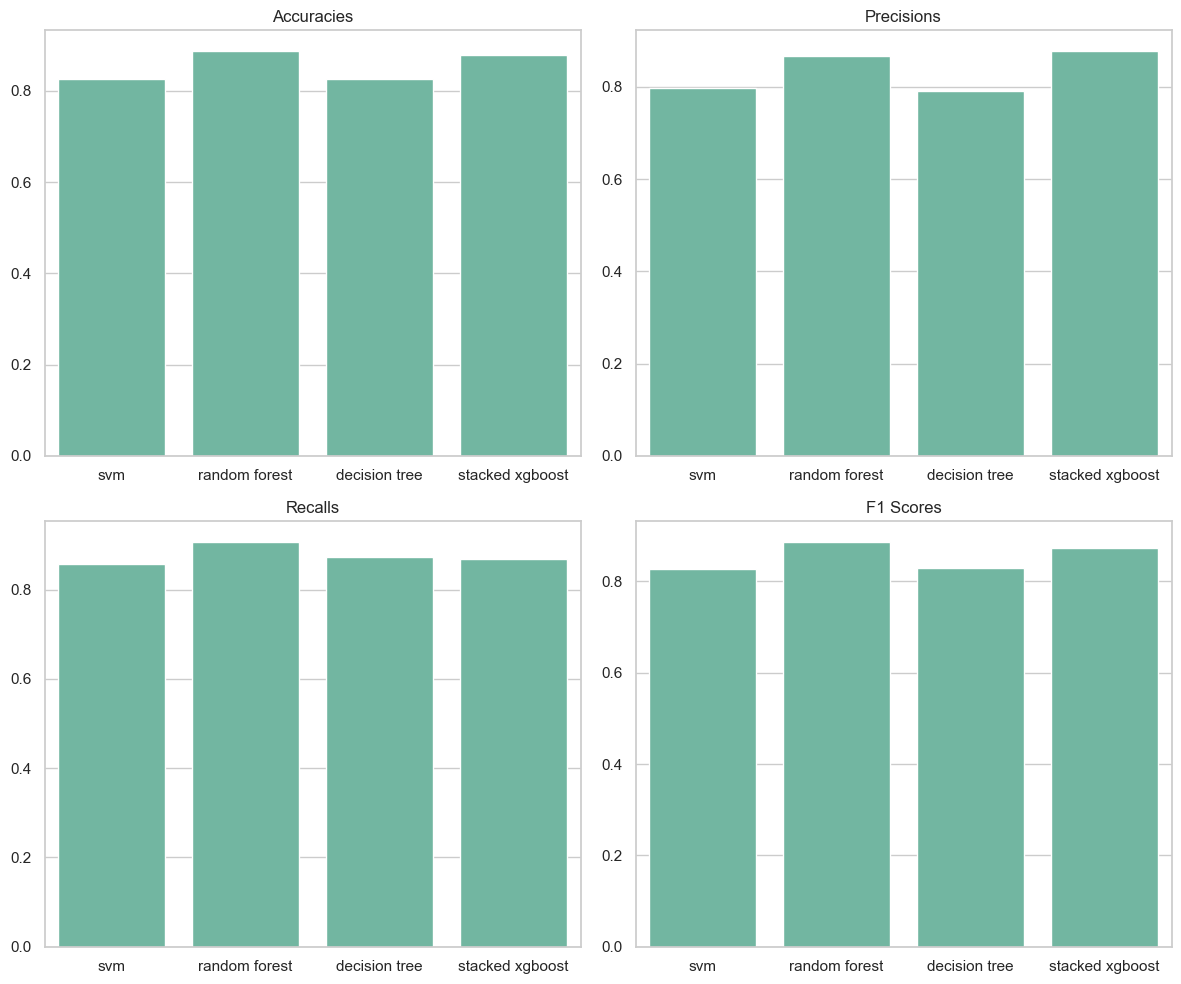

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot accuracies
sns.barplot(x=models, y=accuracies, ax=axes[0, 0])
axes[0, 0].set_title('Accuracies')

# Plot precisions
sns.barplot(x=models, y=precisions, ax=axes[0, 1])
axes[0, 1].set_title('Precisions')

# Plot recalls
sns.barplot(x=models, y=recalls, ax=axes[1, 0])
axes[1, 0].set_title('Recalls')

# Plot F1 scores
sns.barplot(x=models, y=f1, ax=axes[1, 1])
axes[1, 1].set_title('F1 Scores')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

plt.savefig('plots/eda_plots/')